In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv("Waterbase_v2018_1_WISE4_csv/Waterbase_v2018_1_T_WISE4_AggregatedData.csv")

C:\Users\teera\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
data.head()

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,procedureLOQValue,...,procedureAnalyticalMethod,parameterSampleDepth,resultObservationStatus,Remarks,metadata_versionId,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID
0,UK25034780,eionetMonitoringSiteCode,RW,CAS_35065-28-2,total,water,ug/L,2012,2012-01--2012-12,0.001,...,NaN,0.0,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,9233859
1,UK25034780,eionetMonitoringSiteCode,RW,CAS_7012-37-5,total,water,ug/L,2012,2012-01--2012-12,0.001,...,NaN,0.0,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,9233860
2,UK12813020,eionetMonitoringSiteCode,RW,EEA_33-64-7,total,water,ug/L,2012,2012-01--2012-12,5.000,...,NaN,0.0,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,U,QC_OBSERVEDPROPERTY_UNREQUESTED: The present o...,9233861
3,UK12813020,eionetMonitoringSiteCode,RW,CAS_37680-73-2,total,water,ug/L,2012,2012-01--2012-12,0.001,...,NaN,0.0,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,9233862
4,IT01038490,euMonitoringSiteCode,RW,CAS_79-01-6,total,water,ug/L,2011,2011-01--2011-12,0.500,...,APAT CNR IRSA 5150 2003,NaN,NaN,NaN,http://discomap.eea.europa.eu/data/wisesoe/der...,2015-11-30 00:00:00.000,experimental,A,NaN,9233865


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211183 entries, 0 to 3211182
Data columns (total 31 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   monitoringSiteIdentifier              object 
 1   monitoringSiteIdentifierScheme        object 
 2   parameterWaterBodyCategory            object 
 3   observedPropertyDeterminandCode       object 
 4   procedureAnalysedFraction             object 
 5   procedureAnalysedMedia                object 
 6   resultUom                             object 
 7   phenomenonTimeReferenceYear           int64  
 8   parameterSamplingPeriod               object 
 9   procedureLOQValue                     float64
 10  resultNumberOfSamples                 float64
 11  resultQualityNumberOfSamplesBelowLOQ  float64
 12  resultQualityMinimumBelowLOQ          float64
 13  resultMinimumValue                    float64
 14  resultQualityMeanBelowLOQ             float64
 15  resultMeanValue

In [49]:
data["parameterWaterBodyCategory"].value_counts()

RW    2526667
LW     426367
GW     247957
TW       9585
CW        607
Name: parameterWaterBodyCategory, dtype: int64

In [50]:
data = pd.get_dummies(data, columns = ['parameterWaterBodyCategory'])

In [51]:
data.observedPropertyDeterminandCode 

0          CAS_35065-28-2
1           CAS_7012-37-5
2             EEA_33-64-7
3          CAS_37680-73-2
4             CAS_79-01-6
                ...      
3211178     CAS_1912-24-9
3211179      CAS_330-54-1
3211180      CAS_127-18-4
3211181     CAS_7439-97-6
3211182       CAS_79-01-6
Name: observedPropertyDeterminandCode, Length: 3211183, dtype: object

In [52]:
data["procedureAnalysedFraction"].value_counts()

total        3048969
dissolved     161931
SPM              283
Name: procedureAnalysedFraction, dtype: int64

In [53]:
data["procedureAnalysedMedia"].value_counts()

water       3210953
sediment        230
Name: procedureAnalysedMedia, dtype: int64

In [54]:
data["metadata_observationStatus"].value_counts() # A = good, U = bad

A    3112596
U      98587
Name: metadata_observationStatus, dtype: int64

In [55]:
data = data[data["metadata_observationStatus"] != "U"]

In [56]:
data.shape

(3112596, 35)

In [57]:
data["metadata_observationStatus"].value_counts()

A    3112596
Name: metadata_observationStatus, dtype: int64

In [58]:
data["resultObservationStatus"].value_counts() # A = good, O = bad

A    310890
O         6
Name: resultObservationStatus, dtype: int64

In [59]:
data = data[data["resultObservationStatus"] != "O"]

In [60]:
data["resultObservationStatus"].value_counts()

A    310890
Name: resultObservationStatus, dtype: int64

In [61]:
data.shape

(3112590, 35)

In [62]:
data.head()

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,procedureLOQValue,resultNumberOfSamples,...,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
0,UK25034780,eionetMonitoringSiteCode,CAS_35065-28-2,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233859,0,0,0,1,0
1,UK25034780,eionetMonitoringSiteCode,CAS_7012-37-5,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233860,0,0,0,1,0
3,UK12813020,eionetMonitoringSiteCode,CAS_37680-73-2,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233862,0,0,0,1,0
4,IT01038490,euMonitoringSiteCode,CAS_79-01-6,total,water,ug/L,2011,2011-01--2011-12,0.500,8.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233865,0,0,0,1,0
5,IT01038490,euMonitoringSiteCode,CAS_95-50-1,total,water,ug/L,2011,2011-01--2011-12,0.500,8.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233866,0,0,0,1,0


In [63]:
data.describe()

,phenomenonTimeReferenceYear,procedureLOQValue,resultNumberOfSamples,resultQualityNumberOfSamplesBelowLOQ,resultQualityMinimumBelowLOQ,resultMinimumValue,resultQualityMeanBelowLOQ,resultMeanValue,resultQualityMaximumBelowLOQ,resultMaximumValue,resultQualityMedianBelowLOQ,resultMedianValue,resultStandardDeviationValue,parameterSampleDepth,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
count,3.112590e+06,1.560799e+06,3.048980e+06,1.208376e+06,1.597640e+06,2.998326e+06,1.600248e+06,3.112547e+06,1.598833e+06,3.000009e+06,933041.000000,1.795044e+06,2.469078e+06,1.672217e+06,3.112590e+06,3.112590e+06,3.112590e+06,3.112590e+06,3.112590e+06,3.112590e+06
mean,2.007227e+03,1.629422e+02,8.335349e+00,5.650068e+00,8.213884e-01,1.463509e+01,7.249964e-01,2.194262e+01,6.675325e-01,3.628711e+01,0.641746,2.222361e+01,8.662513e+00,8.646097e-01,7.847263e+06,1.828060e-04,7.693529e-02,1.319853e-01,7.879213e-01,2.975336e-03
std,7.651675e+00,1.260436e+04,9.053632e+00,5.967311e+00,3.830269e-01,1.669822e+02,4.465162e-01,6.170722e+02,4.710977e-01,4.643768e+03,0.479488,2.783916e+02,1.412292e+02,7.599156e+00,4.234376e+06,1.351934e-02,2.664888e-01,3.384748e-01,4.087803e-01,5.446544e-02
min,1.931000e+03,-4.422573e+03,1.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+00,0.000000e+00,-2.781630e-02,0.000000e+00,-1.500000e-02,0.000000,-9.900000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.005000e+03,1.000000e-02,3.000000e+00,1.000000e+00,1.000000e+00,1.288000e-02,0.000000e+00,2.000000e-02,0.000000e+00,2.500000e-02,0.000000,3.000000e-02,0.000000e+00,0.000000e+00,1.305876e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.009000e+03,5.000000e-02,7.000000e+00,4.000000e+00,1.000000e+00,1.560000e-01,1.000000e+00,3.393880e-01,1.000000e+00,5.000000e-01,1.000000,5.000000e-01,1.095450e-02,0.000000e+00,9.761770e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.012000e+03,5.000000e-01,1.200000e+01,1.100000e+01,1.000000e+00,3.000000e+00,1.000000e+00,6.096670e+00,1.000000e+00,7.800000e+00,1.000000,6.500000e+00,8.500000e-01,2.000000e-01,1.077523e+07,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.017000e+03,1.000000e+06,8.530000e+02,3.660000e+02,1.000000e+00,6.710000e+04,1.000000e+00,1.010712e+06,1.000000e+00,8.020000e+06,1.000000,9.455000e+04,6.584450e+04,9.990000e+02,1.161203e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [64]:
data.shape

(3112590, 35)

In [65]:
data

,monitoringSiteIdentifier,monitoringSiteIdentifierScheme,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,procedureLOQValue,resultNumberOfSamples,...,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
0,UK25034780,eionetMonitoringSiteCode,CAS_35065-28-2,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233859,0,0,0,1,0
1,UK25034780,eionetMonitoringSiteCode,CAS_7012-37-5,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233860,0,0,0,1,0
3,UK12813020,eionetMonitoringSiteCode,CAS_37680-73-2,total,water,ug/L,2012,2012-01--2012-12,0.001,4.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233862,0,0,0,1,0
4,IT01038490,euMonitoringSiteCode,CAS_79-01-6,total,water,ug/L,2011,2011-01--2011-12,0.500,8.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233865,0,0,0,1,0
5,IT01038490,euMonitoringSiteCode,CAS_95-50-1,total,water,ug/L,2011,2011-01--2011-12,0.500,8.0,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233866,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211178,ATPG61601162,euMonitoringSiteCode,CAS_1912-24-9,total,water,ug/L,2017,2017-01-01--2017-12-31,0.030,1.0,...,2018-12-23 16:49:04.000,stable,A,NaN,11591009,0,1,0,0,0
3211179,ATPG61601162,euMonitoringSiteCode,CAS_330-54-1,total,water,ug/L,2017,2017-01-01--2017-12-31,0.030,1.0,...,2018-12-23 16:49:04.000,stable,A,NaN,11591010,0,1,0,0,0
3211180,ATPG61601162,euMonitoringSiteCode,CAS_127-18-4,total,water,ug/L,2017,2017-01-01--2017-12-31,0.100,1.0,...,2018-12-23 16:49:04.000,stable,A,NaN,11591011,0,1,0,0,0
3211181,ATPG61601162,euMonitoringSiteCode,CAS_7439-97-6,dissolved,water,ug/L,2017,2017-01-01--2017-12-31,0.100,1.0,...,2018-12-23 16:49:04.000,stable,A,NaN,11591012,0,1,0,0,0


In [66]:
data.drop(data.columns[1:8], axis=1,inplace=True)

In [67]:
data

,monitoringSiteIdentifier,procedureLOQValue,resultNumberOfSamples,resultQualityNumberOfSamplesBelowLOQ,resultQualityMinimumBelowLOQ,resultMinimumValue,resultQualityMeanBelowLOQ,resultMeanValue,resultQualityMaximumBelowLOQ,resultMaximumValue,...,metadata_beginLifeSpanVersion,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
0,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233859,0,0,0,1,0
1,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233860,0,0,0,1,0
3,UK12813020,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233862,0,0,0,1,0
4,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233865,0,0,0,1,0
5,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,2015-11-30 00:00:00.000,experimental,A,NaN,9233866,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211178,ATPG61601162,0.030,1.0,1.0,1.0,0.030,1.0,0.030,1.0,0.030,...,2018-12-23 16:49:04.000,stable,A,NaN,11591009,0,1,0,0,0
3211179,ATPG61601162,0.030,1.0,1.0,1.0,0.030,1.0,0.030,1.0,0.030,...,2018-12-23 16:49:04.000,stable,A,NaN,11591010,0,1,0,0,0
3211180,ATPG61601162,0.100,1.0,1.0,1.0,0.100,1.0,0.100,1.0,0.100,...,2018-12-23 16:49:04.000,stable,A,NaN,11591011,0,1,0,0,0
3211181,ATPG61601162,0.100,1.0,1.0,1.0,0.100,1.0,0.100,1.0,0.100,...,2018-12-23 16:49:04.000,stable,A,NaN,11591012,0,1,0,0,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112590 entries, 0 to 3211182
Data columns (total 28 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   monitoringSiteIdentifier              object 
 1   procedureLOQValue                     float64
 2   resultNumberOfSamples                 float64
 3   resultQualityNumberOfSamplesBelowLOQ  float64
 4   resultQualityMinimumBelowLOQ          float64
 5   resultMinimumValue                    float64
 6   resultQualityMeanBelowLOQ             float64
 7   resultMeanValue                       float64
 8   resultQualityMaximumBelowLOQ          float64
 9   resultMaximumValue                    float64
 10  resultQualityMedianBelowLOQ           float64
 11  resultMedianValue                     float64
 12  resultStandardDeviationValue          float64
 13  procedureAnalyticalMethod             object 
 14  parameterSampleDepth                  float64
 15  resultObservati

In [69]:
data.drop(data.columns[16:19], axis=1,inplace=True)

In [70]:
data

,monitoringSiteIdentifier,procedureLOQValue,resultNumberOfSamples,resultQualityNumberOfSamplesBelowLOQ,resultQualityMinimumBelowLOQ,resultMinimumValue,resultQualityMeanBelowLOQ,resultMeanValue,resultQualityMaximumBelowLOQ,resultMaximumValue,...,resultObservationStatus,metadata_statusCode,metadata_observationStatus,metadata_statements,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
0,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,NaN,experimental,A,NaN,9233859,0,0,0,1,0
1,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,NaN,experimental,A,NaN,9233860,0,0,0,1,0
3,UK12813020,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,NaN,experimental,A,NaN,9233862,0,0,0,1,0
4,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,NaN,experimental,A,NaN,9233865,0,0,0,1,0
5,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,NaN,experimental,A,NaN,9233866,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211178,ATPG61601162,0.030,1.0,1.0,1.0,0.030,1.0,0.030,1.0,0.030,...,A,stable,A,NaN,11591009,0,1,0,0,0
3211179,ATPG61601162,0.030,1.0,1.0,1.0,0.030,1.0,0.030,1.0,0.030,...,A,stable,A,NaN,11591010,0,1,0,0,0
3211180,ATPG61601162,0.100,1.0,1.0,1.0,0.100,1.0,0.100,1.0,0.100,...,A,stable,A,NaN,11591011,0,1,0,0,0
3211181,ATPG61601162,0.100,1.0,1.0,1.0,0.100,1.0,0.100,1.0,0.100,...,A,stable,A,NaN,11591012,0,1,0,0,0


In [71]:
data.drop(data.columns[13], axis=1,inplace=True)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112590 entries, 0 to 3211182
Data columns (total 24 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   monitoringSiteIdentifier              object 
 1   procedureLOQValue                     float64
 2   resultNumberOfSamples                 float64
 3   resultQualityNumberOfSamplesBelowLOQ  float64
 4   resultQualityMinimumBelowLOQ          float64
 5   resultMinimumValue                    float64
 6   resultQualityMeanBelowLOQ             float64
 7   resultMeanValue                       float64
 8   resultQualityMaximumBelowLOQ          float64
 9   resultMaximumValue                    float64
 10  resultQualityMedianBelowLOQ           float64
 11  resultMedianValue                     float64
 12  resultStandardDeviationValue          float64
 13  parameterSampleDepth                  float64
 14  resultObservationStatus               object 
 15  metadata_status

In [73]:
data.drop(data.columns[15], axis=1,inplace=True)

In [75]:
data.drop(data.columns[16], axis=1,inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112590 entries, 0 to 3211182
Data columns (total 22 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   monitoringSiteIdentifier              object 
 1   procedureLOQValue                     float64
 2   resultNumberOfSamples                 float64
 3   resultQualityNumberOfSamplesBelowLOQ  float64
 4   resultQualityMinimumBelowLOQ          float64
 5   resultMinimumValue                    float64
 6   resultQualityMeanBelowLOQ             float64
 7   resultMeanValue                       float64
 8   resultQualityMaximumBelowLOQ          float64
 9   resultMaximumValue                    float64
 10  resultQualityMedianBelowLOQ           float64
 11  resultMedianValue                     float64
 12  resultStandardDeviationValue          float64
 13  parameterSampleDepth                  float64
 14  resultObservationStatus               object 
 15  metadata_observ

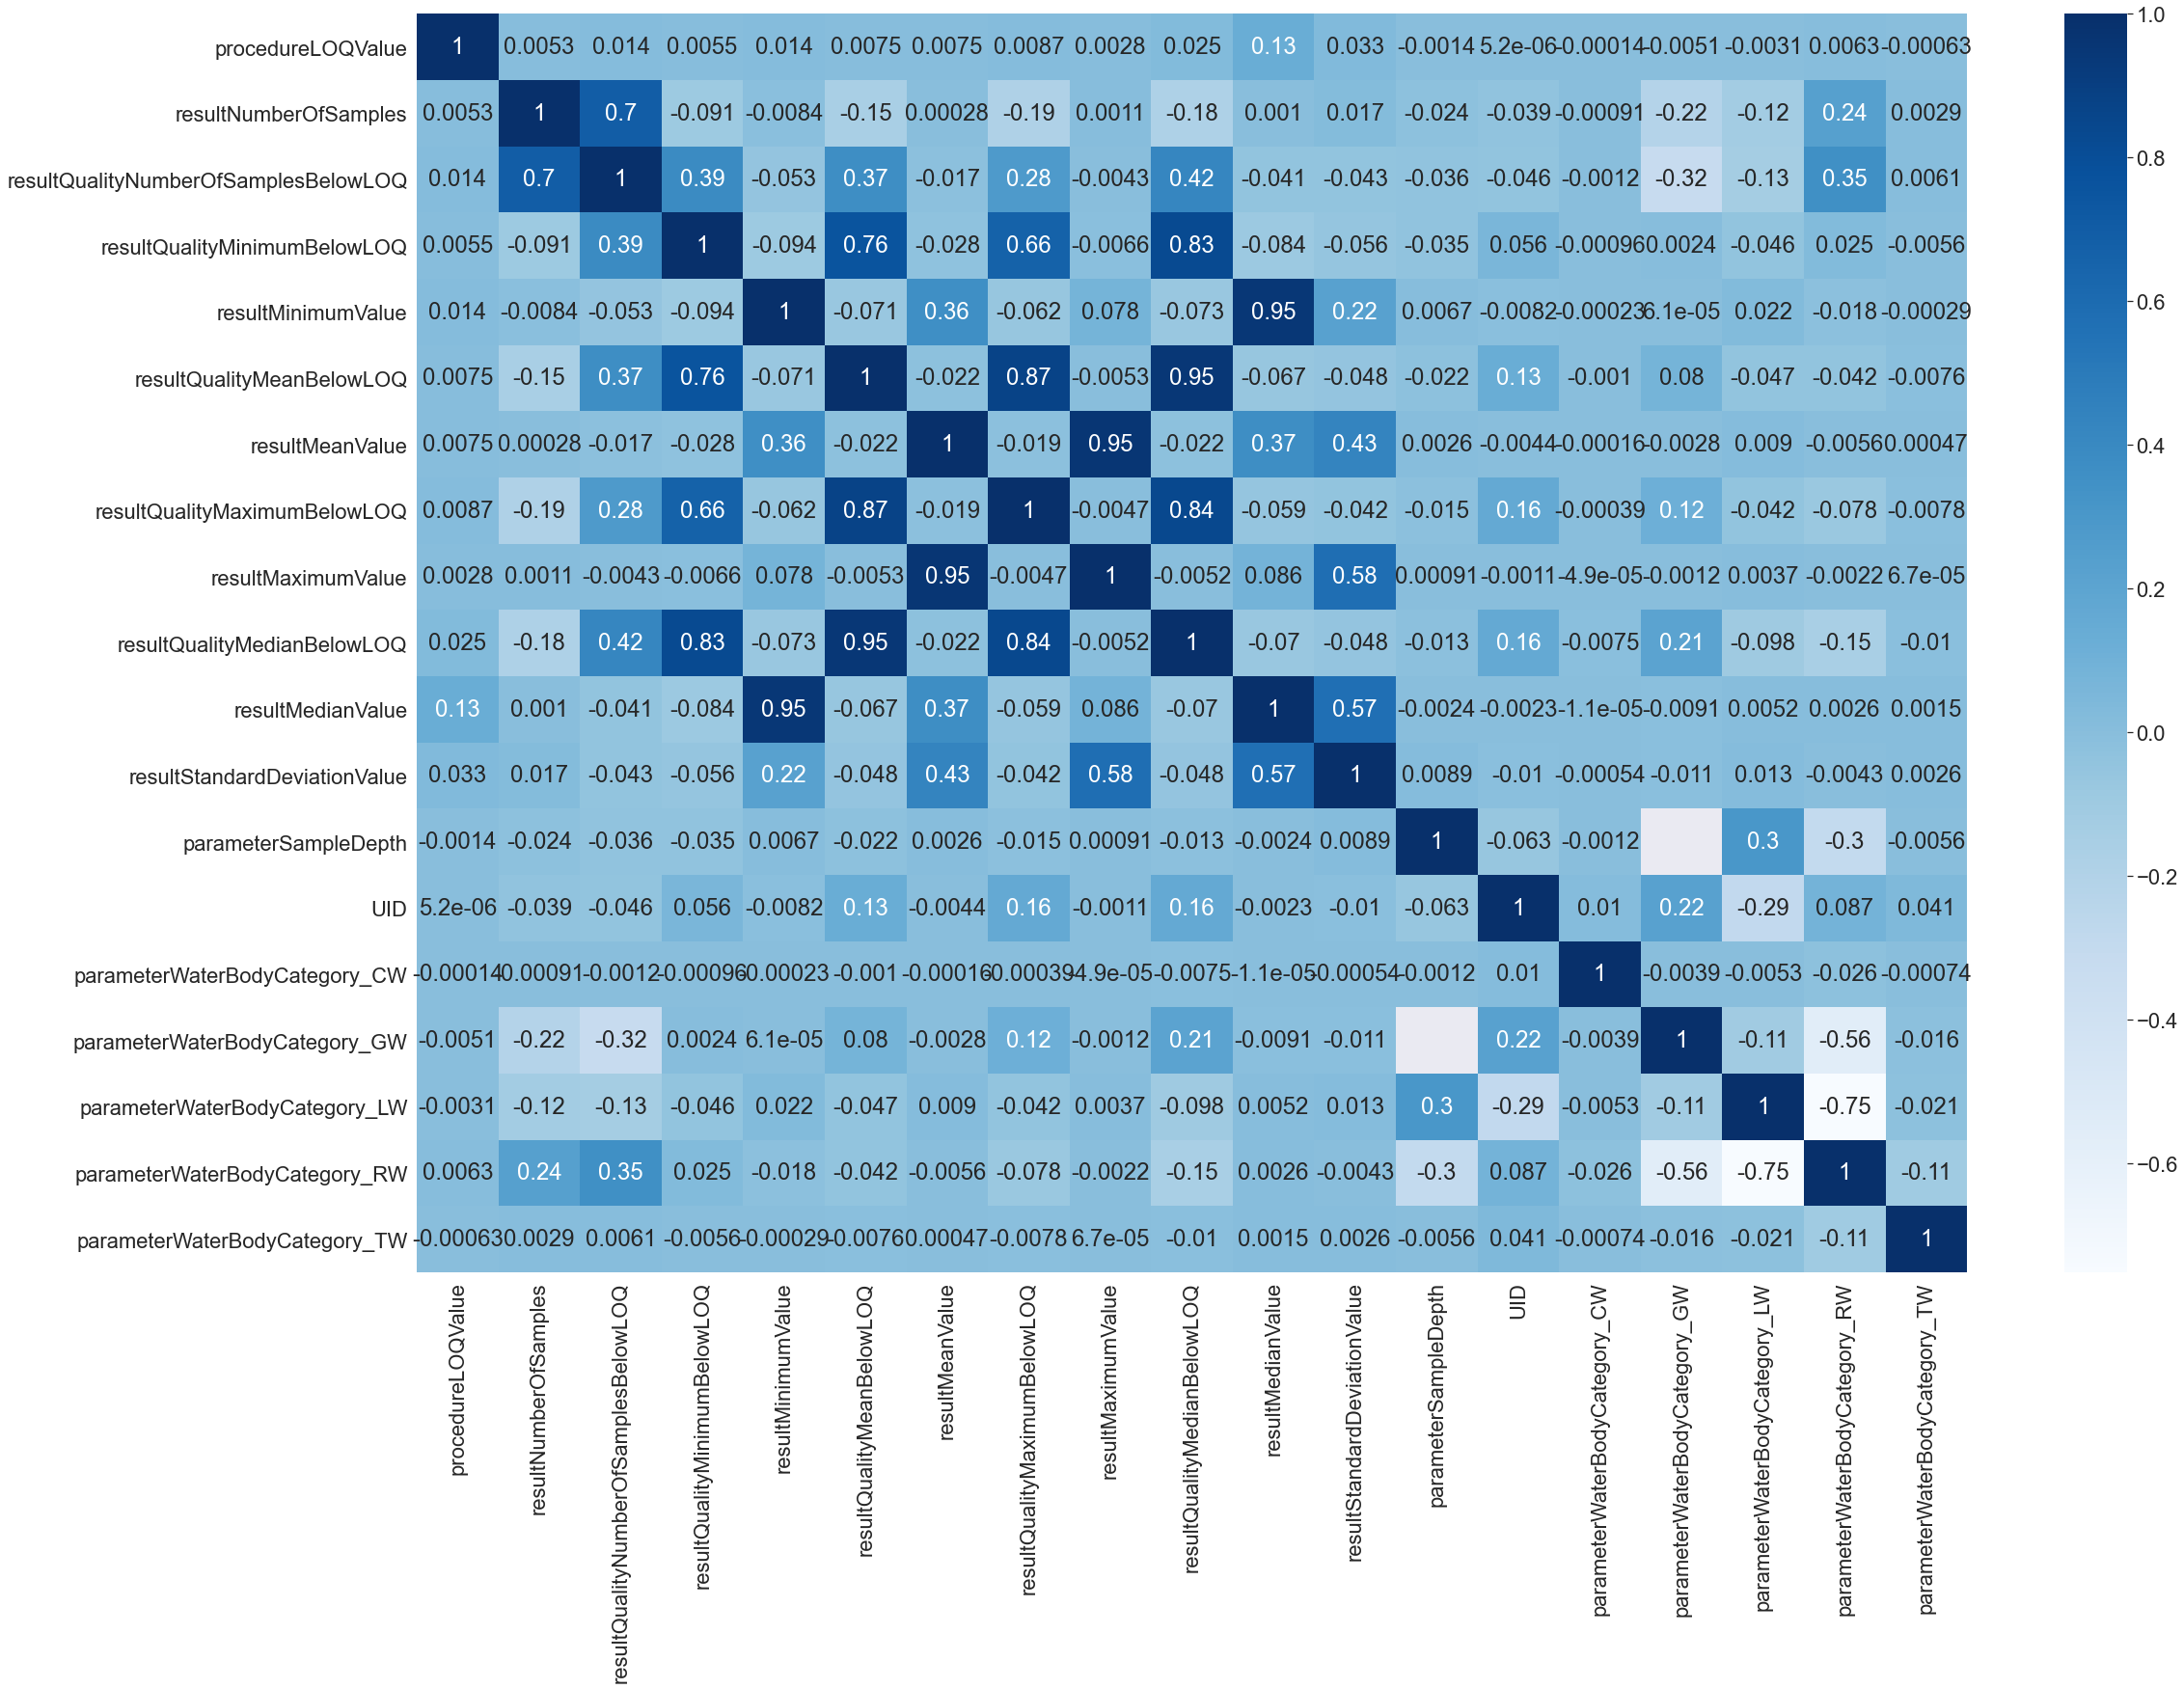

In [77]:
sns.set(style="white",color_codes=True)                          
sns.set(font_scale=2)                                           
plt.figure(figsize=(36,24))                                      
sns.heatmap(data.corr(),annot=True, cmap="Blues") 
plt.show()

In [78]:
data.head()

,monitoringSiteIdentifier,procedureLOQValue,resultNumberOfSamples,resultQualityNumberOfSamplesBelowLOQ,resultQualityMinimumBelowLOQ,resultMinimumValue,resultQualityMeanBelowLOQ,resultMeanValue,resultQualityMaximumBelowLOQ,resultMaximumValue,...,resultStandardDeviationValue,parameterSampleDepth,resultObservationStatus,metadata_observationStatus,UID,parameterWaterBodyCategory_CW,parameterWaterBodyCategory_GW,parameterWaterBodyCategory_LW,parameterWaterBodyCategory_RW,parameterWaterBodyCategory_TW
0,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,0.0,0.0,NaN,A,9233859,0,0,0,1,0
1,UK25034780,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,0.0,0.0,NaN,A,9233860,0,0,0,1,0
3,UK12813020,0.001,4.0,4.0,1.0,0.001,1.0,0.001,1.0,0.001,...,0.0,0.0,NaN,A,9233862,0,0,0,1,0
4,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,0.0,NaN,NaN,A,9233865,0,0,0,1,0
5,IT01038490,0.500,8.0,8.0,1.0,0.500,1.0,0.500,1.0,0.500,...,0.0,NaN,NaN,A,9233866,0,0,0,1,0


In [79]:
data.to_csv('Aggregated_clean.csv')